<a href="https://colab.research.google.com/github/gveronese01/Data-Science/blob/master/churn_prediction_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O seu cliente irá deixar de fazer negócio com sua empresa? O **Churn**, ou rotatividade de clientes, é um dos principais índices a serem bem geridos por empresas de sucesso. Garantir e reter seus clientes faz parte da sobrevivência do negócio. Elaborar e colocar em prática estratégia eficazes de retenção deles poderá terá um custo muito menor para a empresa do que a captação de novos clientes.

Neste artigo, iremos analisar um conjunto de dados de uma empresa de telefonia com características e o histórico de consumo de seus clientes que estão satisfeitos e aqueles que desistiram de consumir o produto de empresa.

Usaremos o  Pycaret,  que é uma biblioteca do tipo open source, Low-Code a fim de tratar e modelar os nossos dados de Churn com Machine Learning, para definirmos um padrão de comportamento dos clientes que desistem de consumir o produto. Assim, o modelo criado irá prever quais são os clientes mais propensos a desistir do produto, para que sejam aplicadas ações de retenção deles.

In [1]:
#importando pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn tools
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
# Plots
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots




#Obtenção de Dados

Os dados foram obtidos de uma empresa de telecomunicações. Neste banco de dados temos os dados como tipo de contrato, serviços contratados, tempo de contrato e características do cliente.


In [2]:
#importando Pycaret
!pip install pycaret * -q
!pip install -U pycaret

from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model, ensemble_model, blend_models
from pycaret.classification import save_model, load_model
from pycaret.classification import get_leaderboard



#configurando o uso do Pycaret no Google Colab
from pycaret.utils import enable_colab 
enable_colab()

#importando dados do banco de dados
df=pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")


ERROR: Could not find a version that satisfies the requirement churn_pycaret.pkl (from versions: none)
ERROR: No matching distribution found for churn_pycaret.pkl
Colab mode enabled.


## Análise Inicial dos Dados

* `customerID`: Identificação do cliente;
* `gender`: gênero;
* `SeniorCitizen`: idoso aposentado;
* `Partner	Dependents`: dependentes no plano;
* `tenure`: tempo utilizado de contrato;
* `PhoneService`: serviço de telefone;
* `MultipleLines`: múltiplas linhas;
* `InternetService`: serviço de internet;
* `OnlineSecurity`: serviço de segurança na internet;
* `OnlineBackup`: backup online;
* `DeviceProtection`: proteção de dados;
* `TechSupport`: suporte técnico;
* `StreamingTV`: streaming TV;
* `StreamingMovies`: streaming movies;
* `Contract`: contrato;
* `PaperlessBilling`: conta on-line;
* `PaymentMethod`: método de pagamento;
* `MonthlyCharges`: carregamentos por mês;
* `TotalCharges`: total de carregamentos;
* `Churn`: perda de cliente, rotatividade de cliente;

In [3]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Abaixo verificamos as cinco entradas do nosso dataset.

In [4]:
# cinco primeiras entradas
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Análise inicial dos dados

O nosso dataset importado possui 7043 entradas com 21 variáveis. A nossa variável alvo é a coluna "Churn", nela sabemos se o cliente seguirá com a empresa ou não. Na coluna churn, temos 5.174 clientes que representam "não" e 1.869 com "sim" para a rotatividade de clientes;

In [5]:
#ver balanceamento de dados
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Avaliando se há valores ausentes em nosso dataset, vericamos que não há valores nulos/ausentes.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
100*(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Churn               0.0
OnlineSecurity      0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineBackup        0.0
TotalCharges        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
customerID          0.0
dtype: float64

Neste dataset, temos 7043 entradas e 21 variáveis. Verificamos, também, o tipo de variável correspondentes, sendo necessária a transformação da variável *TotalCharges* de **object** para o tipo numérica **float64** para que o modelo a ser construído possa ter um melhor desempenho.

In [7]:
# identificar o volume de dados do DataFrame
print("Entradas do dataset:\t {}".format(df.shape[0]))
print("Variáveis do dataset:\t {}\n".format(df.shape[1]))

# verificar os tipos das variáveis presentes no Dataset
display(df.dtypes)

Entradas do dataset:	 7043
Variáveis do dataset:	 21



customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:

#Transformando TotalCharges em numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print(f"A feature TotalCharges é do tipo {df.TotalCharges.dtype} agora")

#Transformando SeniorCitizen em bool
df["SeniorCitizen"]=df["SeniorCitizen"].astype(object)

print(f"A feature SeniorCitizen é do tipo {df.SeniorCitizen.dtype} agora")


A feature TotalCharges é do tipo float64 agora
A feature SeniorCitizen é do tipo object agora


Conferindo a transformação da variável *TotalCharges* de object para int64 e *SeniorCitizen* para boleano

In [9]:
#conferindo a transformação da variável TotalCharges
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Fazendo uma comparação entre os métodos de pagamento, *Eletronic check, Mailed check, Bank transfer (automatic) e Credit card (automatic)*, em relação ao *TotalCharges* em US$ e *tenure*,  em meses, percebe-se que:




*   A grande maioria do *Churn* se dá na forma de pagamento Eletronic check em relação as demais.
*   Não há diferença relevante de Churn entre as formas de pagamento  Bank transfer (automatic) e Credit card (automatic).
*   Mailed check é a forma de pagamento onde se percebe que Churn ocorre em sua totalidade até os 11º mês.





In [10]:
import plotly.express as px

fig = px.scatter(x=df['TotalCharges'], y=df['tenure'], 
                 color = df['Churn'], template ='simple_white', opacity = 0.5, facet_col = df['PaymentMethod'],
                 title = 'Customer Tenure em função de Total Charge em diferentes Forma de Pagamento',
                 labels = {'x' : 'Total Charges ($)', 'y' : 'Customer Tenure (em meses)', 'facet_col' : 'Pagamento', 'color' : 'Churn'})


plt.tight_layout()
fig.show()

<Figure size 432x288 with 0 Axes>

A seguir, no gráfico de barras, notamos em relação ao tipo de contrato:
*        Um grande número de Churn nos contratos do tipo Month-to-month em comparação com os do tipo One Year Contract e Two Year.
*        Os clientes que menos provocam Churn são que possuem contrato de dois anos.


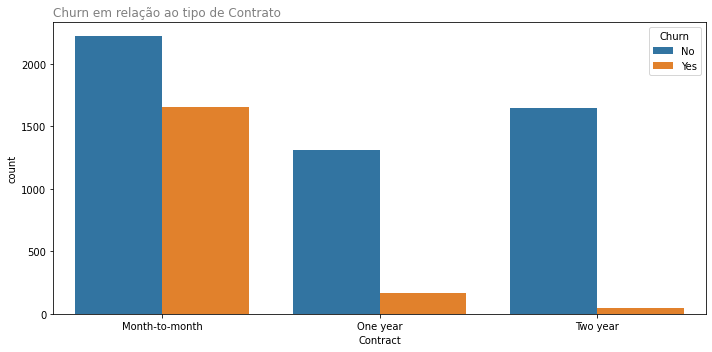

In [11]:
fig, ax=plt.subplots(1,1, figsize=(10,5))
sns.countplot(data=df, x='Contract', hue='Churn', ax=ax )
ax.set_title("Churn em relação ao tipo de Contrato", loc='left', color='gray')

plt.tight_layout()

#Preparação dos dados para o modelo:


Iremos reservar 5% dos dados do dataset, sem passar por nenhum tipo de tratamento, para testar no modelo criado, após passar pelas etapas de treino e teste. <br>
Usaremos o **Pycaret**, que é uma biblioteca do tipo open source, *Low-Code* para tratar e modelar os nossos dados de Churn com Machine Learning.
O número de entradas usados para o modelo é 6.691 e 5% dos dados separados representa 352.



In [12]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Dados usados para o Modelo: ' + str(data.shape))
print('5% dos dados separados para predição: ' + str(data_unseen.shape))




Dados usados para o Modelo: (6691, 21)
5% dos dados separados para predição: (352, 21)


# Pycaret Setup

No comando *setup* do *Pycaret* para a criação do modelo, pode-se fazer o tratamento e o pré-tratamentos dos dados do nosso dataset, como por exemplo: <br>
*            remoção de outliers; <br>
*            ignorar colunas com dados pouco importantes e que não trazem informações para a construção do modelo. Neste caso usamos para a feature   ['CustomerID'] ;
*            inferir o tipo dos dados presentes no dataset ( variável categórica ou numérica);
*            tratamento estatístico como normalização dos dados através do Z-score; <br>
*            divisão dos dados em 70% para treino e 30% para teste do modelo;
*            PCA para redução de dimensionalidade;

*            remoção de features baseada em dados de multicolinearidade;
*            aplicação de método de balanceamento de dados. Neste caso, usou-se o método de *smote*;
*   Foi adotado o valor numérico de  "0" para não e o valor "1" para sim ao Churn na coluna Churn e label;


A variável alvo do modelo foi definida como sendo a coluna Churn, pois através dela, saberemos se o cliente está satisfeito ou não com o serviço prestado pela a empresa. Caso haja grande possibilidade de Churn do cliente, este deverá ser encaminhado para o departamento de retenção de clientes.

In [13]:
#setup Pycaret

clf=setup(data=data, target='Churn', train_size=0.7, ignore_features=['customerID'], normalize=True, feature_selection=True, remove_outliers=True, 
remove_multicollinearity=True,  ignore_low_variance=True, transformation=True, pca=True, 
bin_numeric_features=['MonthlyCharges', 'TotalCharges'], fix_imbalance=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(6691, 21)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


# Seleção do Modelo
 Neste exemplo de aprendizado supervisionado para **Classificação**, em que queremos prever se o cliente fará Churn, é importante usarmos a métrica adequada para avaliarmos se o desempenho do modelo é adequado ou não. A avaliação de um modelo de classificação é feita a partir da comparação entre os valores preditos pelo modelo e os valores verdadeiros.
<br>Executando o comando *compare_models*, teremos uma lista com os principais modelos e suas métricas para avaliação de performance. Esta função treina todos os algoritmos disponíveis na biblioteca de modelos e avalia várias métricas de desempenho usando validação cruzada (*cross-validation*).<br>
Usaremos a métrica *Recall*, que é definida como a taxa de verdadeiro positivo. 


In [14]:
# início do treino do modelo compare all models #NADA
best_model = compare_models(sort='Recall')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7448,0.0000,0.7948,0.5264,0.6333,0.4498,0.4723,0.103
lda,Linear Discriminant Analysis,0.7448,0.8437,0.7948,0.5264,0.6333,0.4498,0.4723,0.137
svm,SVM - Linear Kernel,0.7442,0.0000,0.7802,0.5274,0.6284,0.4447,0.4655,0.133
lr,Logistic Regression,0.7552,0.8454,0.7785,0.5410,0.6381,0.4621,0.4799,0.415
ada,Ada Boost Classifier,0.7484,0.8197,0.7389,0.5341,0.6195,0.4390,0.4523,1.335
knn,K Neighbors Classifier,0.7014,0.7734,0.7388,0.4754,0.5784,0.3638,0.3852,0.362
gbc,Gradient Boosting Classifier,0.7669,0.8355,0.7331,0.5616,0.6355,0.4687,0.4781,5.953
qda,Quadratic Discriminant Analysis,0.7482,0.8245,0.7186,0.5346,0.6127,0.4322,0.4429,0.112
nb,Naive Bayes,0.7403,0.7835,0.6528,0.5250,0.5817,0.3966,0.4019,0.102
lightgbm,Light Gradient Boosting Machine,0.7714,0.8213,0.6350,0.5804,0.6059,0.4454,0.4468,0.714


O modelo escolhido que apresentou o maior *Recall* é o **ridge** *(Ridge Classifier)*. Usamos esta métrica de avaliação, o *Recall*, pois, no caso que estamos avaliando,  é melhor que o modelo preveja clientes satisfeitos com a empresa como sendo *Churn* , do que a empresa deixar escapar clientes insatisfeitos sem a possibilidade de aplicar estratégia de marketing para mantê-lo.
O valor do *Recall*, usando 10 como número de validações cuzadas, é de **0.8150**;

In [15]:
top3=compare_models(n_select=3, sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7448,0.0000,0.7948,0.5264,0.6333,0.4498,0.4723,0.101
lda,Linear Discriminant Analysis,0.7448,0.8437,0.7948,0.5264,0.6333,0.4498,0.4723,0.136
svm,SVM - Linear Kernel,0.7442,0.0000,0.7802,0.5274,0.6284,0.4447,0.4655,0.133
lr,Logistic Regression,0.7552,0.8454,0.7785,0.5410,0.6381,0.4621,0.4799,0.125
ada,Ada Boost Classifier,0.7484,0.8197,0.7389,0.5341,0.6195,0.4390,0.4523,1.336
knn,K Neighbors Classifier,0.7014,0.7734,0.7388,0.4754,0.5784,0.3638,0.3852,0.353
gbc,Gradient Boosting Classifier,0.7669,0.8355,0.7331,0.5616,0.6355,0.4687,0.4781,5.948
qda,Quadratic Discriminant Analysis,0.7482,0.8245,0.7186,0.5346,0.6127,0.4322,0.4429,0.111
nb,Naive Bayes,0.7403,0.7835,0.6528,0.5250,0.5817,0.3966,0.4019,0.102
lightgbm,Light Gradient Boosting Machine,0.7714,0.8213,0.6350,0.5804,0.6059,0.4454,0.4468,0.679


In [16]:
#create model
base_model=create_model('ridge', fold=10, cross_validation=True)



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7101,0.0,0.7317,0.4839,0.5825,0.3743,0.3931
1,0.7326,0.0,0.7642,0.5109,0.6124,0.4203,0.4402
2,0.7551,0.0,0.8293,0.5368,0.6518,0.4759,0.5027
3,0.7281,0.0,0.7805,0.5053,0.6134,0.4182,0.4417
4,0.7416,0.0,0.7886,0.5215,0.6278,0.4422,0.4644
5,0.7596,0.0,0.8306,0.5450,0.6581,0.4848,0.5104
6,0.7618,0.0,0.8226,0.5484,0.6581,0.4863,0.5098
7,0.7371,0.0,0.7903,0.5185,0.6262,0.4366,0.4597
8,0.7635,0.0,0.7967,0.5506,0.6512,0.4812,0.5000
9,0.7590,0.0,0.8130,0.5435,0.6515,0.4782,0.5009


Os parâmetros utilizados em nosso modelo base *ridge* são:

In [17]:
print(base_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


In [18]:
plot_model(base_model, plot='parameter')

,Parameters
alpha,1.0
class_weight,None
copy_X,True
fit_intercept,True
max_iter,None
normalize,False
random_state,123
solver,auto
tol,0.001


Utilizando o comando de *tune_model* é possível otimizar os parâmetros do modelo. Foi utilizado este comando, juntamente com a métrica a ser otimizada, neste caso o *Recall*.
Obtivemos um  aumento na média do nosso *Recall* de 0.8150 para **0.8938**.

In [19]:
#tuned model
tuned_model=tune_model(base_model, fold=10, optimize='Recall') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6652,0.0,0.9106,0.4480,0.6005,0.3654,0.4344
1,0.6854,0.0,0.8780,0.4635,0.6067,0.3838,0.4386
2,0.6876,0.0,0.9350,0.4675,0.6233,0.4035,0.4750
3,0.6787,0.0,0.8943,0.4583,0.6061,0.3791,0.4402
4,0.6831,0.0,0.8699,0.4612,0.6028,0.3782,0.4313
5,0.6831,0.0,0.8952,0.4644,0.6116,0.3864,0.4463
6,0.6944,0.0,0.9194,0.4750,0.6264,0.4093,0.4739
7,0.6427,0.0,0.8790,0.4308,0.5782,0.3263,0.3896
8,0.7162,0.0,0.9106,0.4934,0.6400,0.4381,0.4945
9,0.7027,0.0,0.8943,0.4803,0.6250,0.4137,0.4689


In [20]:
plot_model(tuned_model, plot='parameter')

,Parameters
alpha,8.96
class_weight,None
copy_X,True
fit_intercept,False
max_iter,None
normalize,True
random_state,123
solver,auto
tol,0.001


In [21]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

O teste do nosso modelo criado será feito com os 30% das entradas que foram separadas na etapa de *setup* no Pycaret. O sistema automaticamente criou a coluna **Label** com a previsão feita pelo modelo para a variável **Churn**. 
<br>
 A pequena diferença entre o resultado do *Recall* entre o modelo de treino e o de teste nos informa que o modelo não sofre de *over-fitting* .<br>
 No modelo treinado, notamos um aumento do *Recall* de 0.8446 para 0.8867 mesmo sendo o mesmo modelo. Isto se deve ao modelo nesta etapa também ser treinado com o dataset inteiro (dados de treino e dados de teste).

In [22]:
#fazendo previsões sem o conjunto de teste

predict_model(tuned_model, raw_score=True)



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.6882,0.7516,0.8806,0.4433,0.5898,0.3798,0.4384


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14,Component_15,Component_16,Component_17,Component_18,Component_19,Component_20,Component_21,Component_22,Component_23,Component_24,Component_25,Component_26,Component_27,Component_28,Component_29,Component_30,Component_31,Component_32,Component_33,Component_34,Component_35,Component_36,Component_37,Component_38,Component_39,Component_40,Churn,Label
0,0.173851,-1.012347,-0.640916,-0.005102,0.891681,-0.841883,0.781097,-0.426830,0.875547,0.555977,-0.529270,0.019449,0.039307,0.066426,-0.072089,0.868287,-0.118325,-0.204116,-0.328675,-0.125540,-0.260484,-0.283288,0.137049,0.157110,0.132027,0.175878,-0.024999,0.047526,-0.508655,0.045146,-0.056632,0.090794,-0.064900,0.050024,-0.007658,0.525949,0.345719,0.503515,0.703175,0.348577,No,Yes
1,-1.414268,0.346108,-0.075473,1.234015,-0.342268,0.327500,1.019330,1.007919,-0.254187,-0.075029,-0.931449,-0.194871,0.132223,-0.569271,0.165569,0.661325,0.583204,0.155185,0.213685,-0.469178,-0.044917,-0.097683,0.076868,-0.338391,-0.329949,-0.279114,-0.127519,-0.057403,-0.189513,0.436534,-0.092630,0.080742,-0.361295,0.050219,0.241501,0.023655,-0.038118,-0.005272,0.322286,-0.334735,Yes,Yes
2,2.201957,-0.661972,0.208648,-0.260204,0.358946,-0.734928,-0.714351,-1.048126,0.631114,-0.772969,0.130699,-0.912248,0.099441,-0.315800,-0.575571,-0.305810,0.051301,-0.060458,0.586493,0.145598,-0.562663,0.355467,-0.324262,0.331538,0.365956,0.238481,0.018914,-0.175665,-0.344585,0.041095,-0.331386,0.137427,-0.457856,-0.101832,0.288552,-0.038536,-0.191526,0.185525,-0.607648,-0.351620,No,No
3,-0.800725,-0.133073,1.187996,-0.469594,-0.534460,0.846821,0.018217,0.144896,-0.682876,0.468262,-0.001277,-0.180197,-0.646085,-0.306072,0.676856,-0.400913,-0.188263,0.479574,-0.258831,-0.107665,0.415332,-0.362951,-0.026758,0.186779,0.028834,-0.042102,-0.070640,-0.146267,0.009696,-0.005245,-0.247637,-0.314574,-0.306536,0.715827,-0.093639,-0.129663,0.199452,-0.258390,0.023912,-0.473086,No,No
4,-1.912441,0.394124,0.473464,0.794355,-0.195325,-0.041207,0.177160,0.173936,-0.716430,0.645369,-0.111059,0.826134,-0.289776,-0.570913,-0.020661,0.707466,0.644487,0.175025,0.148852,-0.384352,0.052109,0.002854,-0.038558,-0.167684,0.002405,-0.379341,0.543847,-0.212131,-0.377520,-0.199435,-0.023234,-0.189138,0.033254,-0.363427,-0.211856,-0.041616,0.134483,0.075347,-0.013760,-0.169741,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,-1.746825,-0.685049,-0.464207,0.091141,0.072076,0.896413,0.451958,0.308879,-0.026994,0.052852,0.491394,0.813680,-0.447971,0.031465,-0.155283,0.021792,-0.100145,-0.070054,0.109085,0.755196,0.549163,-0.737113,-0.541738,0.181653,-0.553050,0.191779,0.051909,-0.106040,-0.224270,0.014047,0.024356,-0.030448,0.229761,-0.001942,-0.109920,0.115226,-0.032516,-0.050657,-0.048922,-0.092557,Yes,Yes
2004,0.547350,0.200117,1.358186,0.315199,-1.020066,0.025491,-1.146204,-0.341829,-0.908798,0.120787,0.449739,0.336700,0.474399,0.649220,0.714665,0.246465,-0.376937,0.100498,-0.238973,-0.252440,0.015272,0.122040,-0.123566,0.597059,0.319647,0.301023,-0.042583,-0.157583,0.175990,-0.139747,0.167986,-0.364600,-0.148365,0.796572,-0.100613,0.001004,0.204905,-0.324535,-0.069326,0.076476,No,No
2005,-2.348364,0.153772,0.242554,-0.351062,-0.070077,0.306720,-0.364431,-0.312243,0.155113,-0.524597,-0.256353,0.011965,0.232617,-0.448602,0.196662,0.786412,0.809685,-0.112105,0.491175,-0.424293,-0.146559,-0.106795,0.540392,0.077668,-0.004220,0.096760,0.115457,0.086933,-0.052715,-0.042333,0.110434,-0.064834,0.103582,0.049028,-0.053430,0.051597,0.055042,0.024678,0.023314,-0.035600,Yes,Yes
2006,-0.334146,0.049571,0.442982,-0.074991,0.783934,0.048570,-1.341957,-0.356005,-0.196356,-1.422182,0.092282,-0.099750,0.041892,-0.188336,-0.636825,0.747993,-0.437702,-0.007217,

Após constantar que o nosso modelo não está com *over-fitting*, finalizamos o modelo criado:

In [23]:

#finalizando o modelo
final_model=finalize_model(tuned_model)

In [24]:
print(final_model)

RidgeClassifier(alpha=8.96, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001)


Os dados de validação (unseen) são os 5% do conjunto total de entrada, sem nenhum pré-tratamento, que foram separados no início do problema do nosso dataset, para, então, aplicarmos no modelo final treinado e já testado.

Avaliou-se a métrica utilizada, Recall, com o modelo criado em cima dos dados não vistos (unseen), chegando a um escore de 0.91;

In [25]:
#unseen_predictions
unseen_predictions=predict_model(final_model, data=data_unseen, raw_score=True)
unseen_predictions.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Label
0,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,Yes
1,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No,No
2,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Yes
3,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,No
4,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No,No


In [26]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Churn'], unseen_predictions['Label'], metric='Recall')



0.9101

In [27]:
#SALVAR MODELO
save_model(final_model, 'churn_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['customerID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                                        threshold=0.9)),
                 ('dfs', 'passthrough'),
                 ('pca',
                  Reduce_Dimensions_For_Supervised_Path(method='pca_liner',
                                    

In [28]:
#CARREGAR MODELO
saved_model=load_model('churn_pycaret')

Transformation Pipeline and Model Successfully Loaded


In [29]:
new_pred=predict_model(saved_model, data)

In [30]:
new_pred.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Label
0,3209-ZPKFI,Male,0,Yes,Yes,47,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,54.25,2538.20,No,No
1,6542-LWGXJ,Male,0,Yes,No,3,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.00,78.25,No,Yes
2,1273-MTETI,Female,1,No,No,4,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,88.85,372.45,Yes,Yes
3,2607-DHDAK,Male,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,No,No
4,8345-MVDYC,Female,0,No,No,45,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),81.65,3618.70,No,No
